時間:每秒
分別對theta、alpha、gamma、theta alpha 、alpha gamma、theta gamma、theta alpha gamma、gamma1-6

In [53]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

'wget' 不是內部或外部命令、可執行的程式或批次檔。
'export' 不是內部或外部命令、可執行的程式或批次檔。


測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


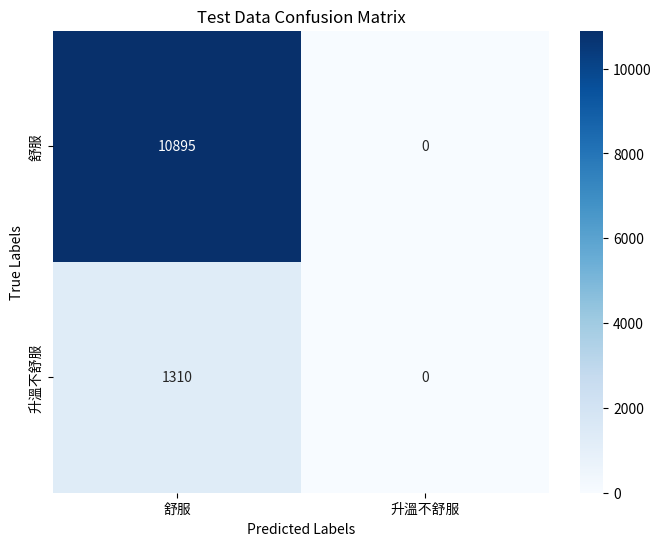

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


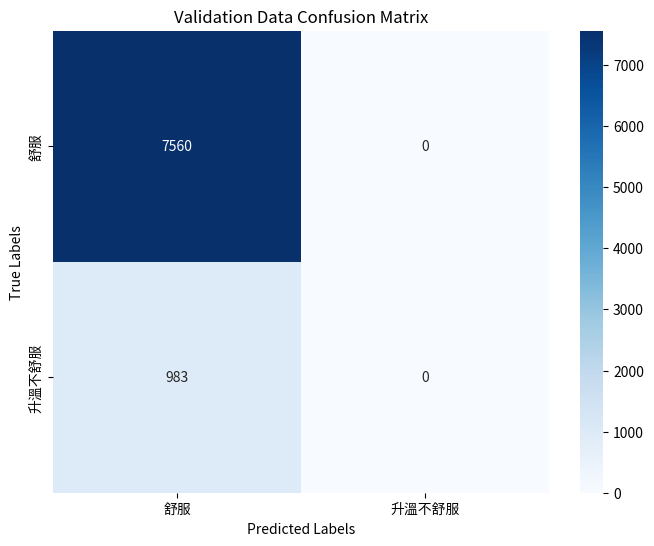

In [4]:
#羅吉斯回歸 Cz 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    X_train_new.append(np.concatenate([theta_combined]))  # 包裝成列表
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

# 轉換成 numpy 陣列
X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    X_test_new.append(np.concatenate([theta_combined]))  # 包裝成列表
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

# 轉換成 numpy 陣列
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['theta']
    X_val_new.append(np.concatenate([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用state作為目標值

# 轉換成 numpy 陣列
X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8950430151577222
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       1.00      0.02      0.04      1310

    accuracy                           0.90     12205
   macro avg       0.95      0.51      0.49     12205
weighted avg       0.91      0.90      0.85     12205

測試集混淆矩陣:


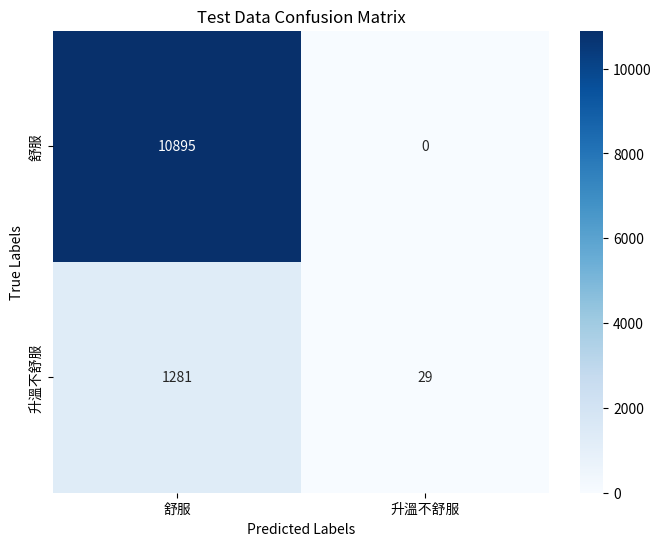

驗證集準確率: 0.8876272972023879
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94      7560
       升溫不舒服       1.00      0.02      0.05       983

    accuracy                           0.89      8543
   macro avg       0.94      0.51      0.49      8543
weighted avg       0.90      0.89      0.84      8543

驗證集混淆矩陣:


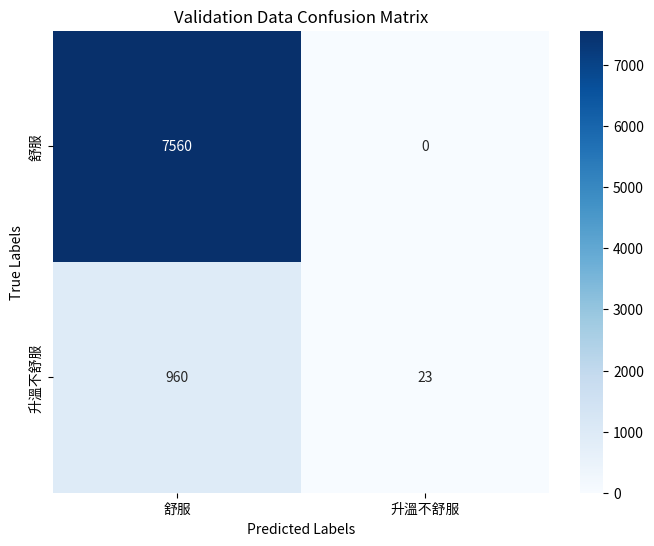

In [5]:
#羅吉斯回歸  Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    X_test_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['theta']
    X_val_new.append(np.concatenate(([theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


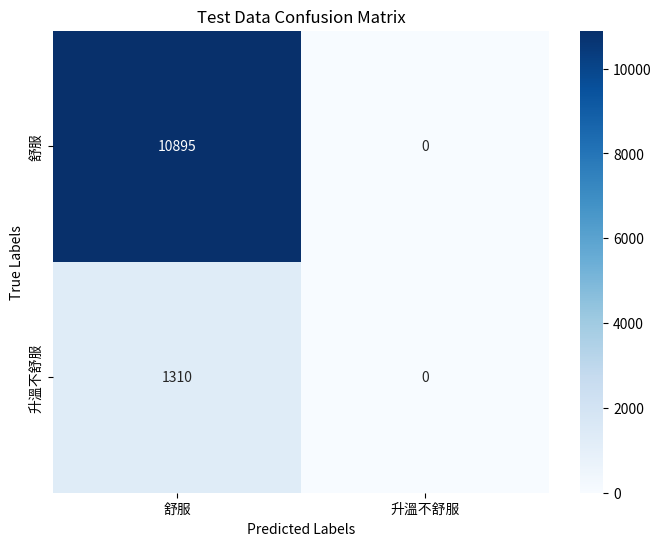

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


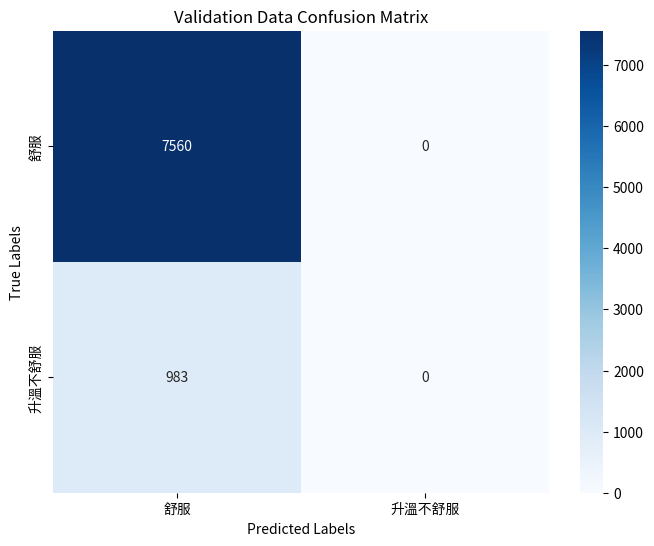

In [6]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_Cz_combined = train_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   theta_Cz_combined = test_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   theta_Cz_combined = validation_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


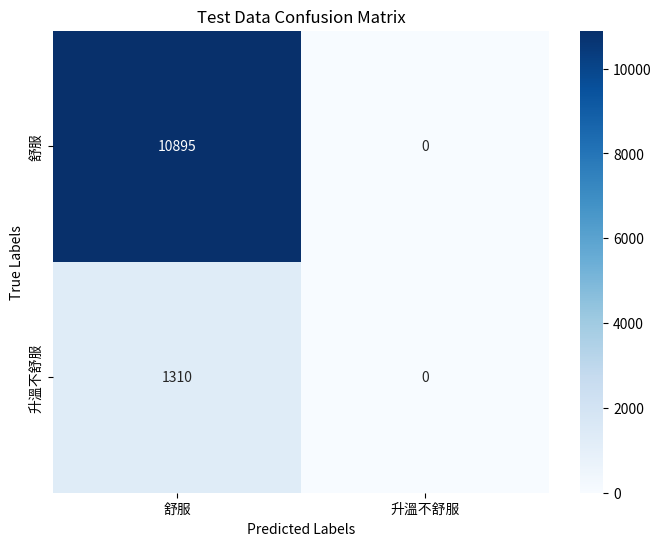

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


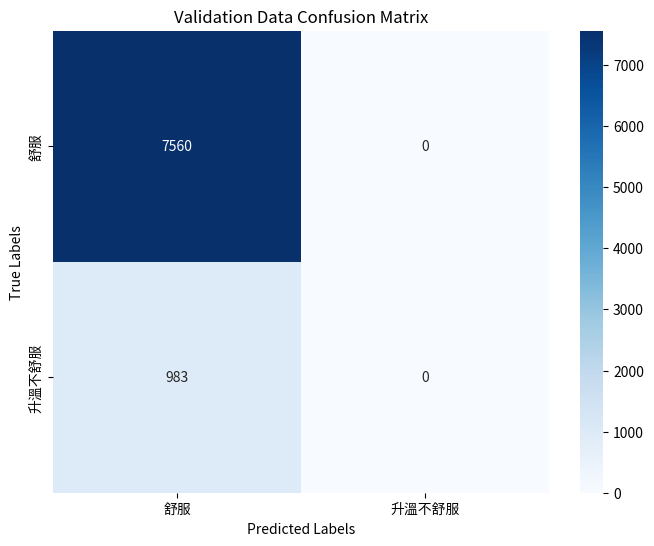

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


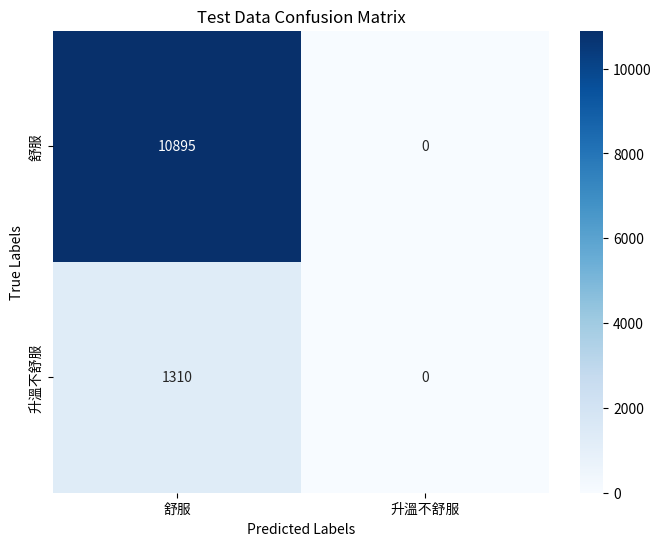

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


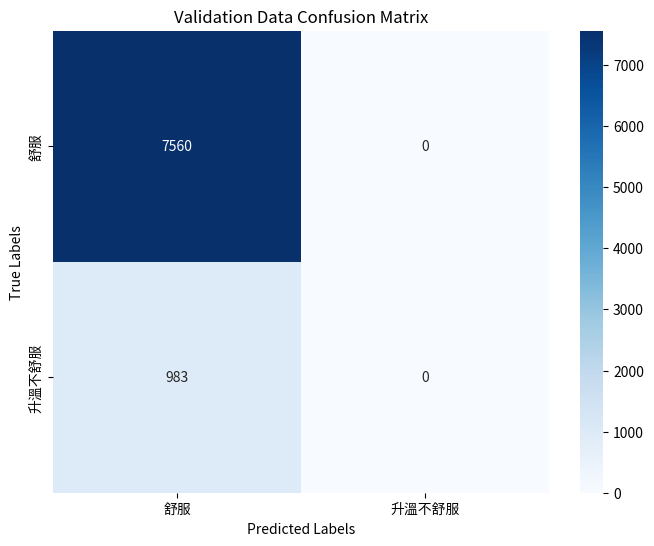

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


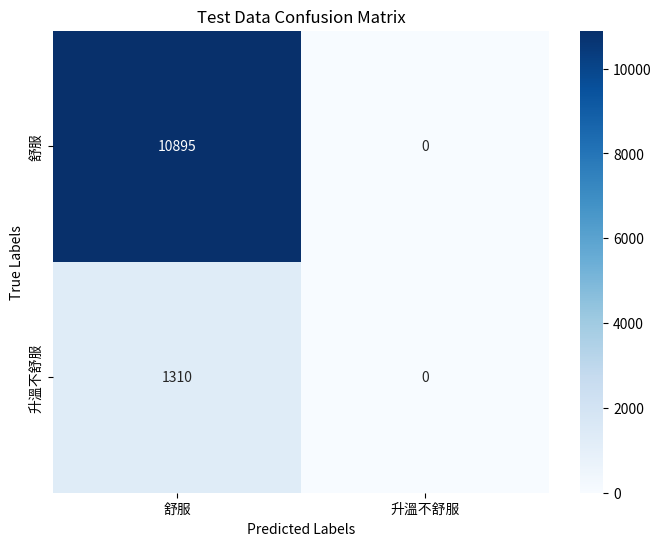

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


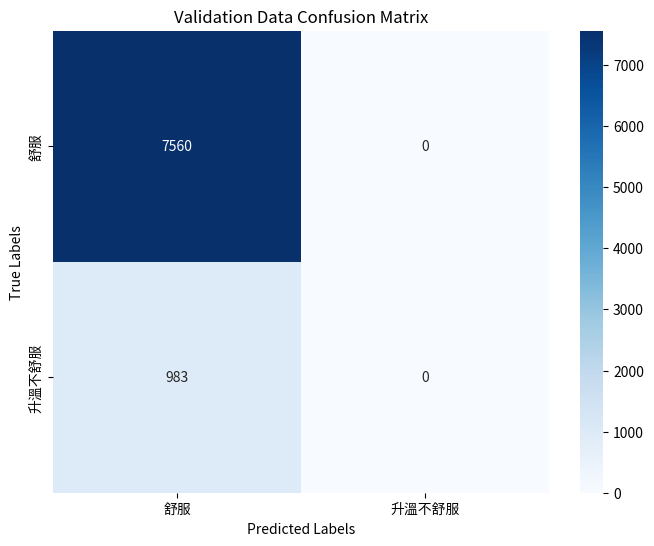

In [9]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_Cz_combined = train_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   theta_Cz_combined = test_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   theta_Cz_combined = validation_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9854977468250717
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     10895
       升溫不舒服       0.91      0.95      0.93      1310

    accuracy                           0.99     12205
   macro avg       0.95      0.97      0.96     12205
weighted avg       0.99      0.99      0.99     12205

測試集混淆矩陣:


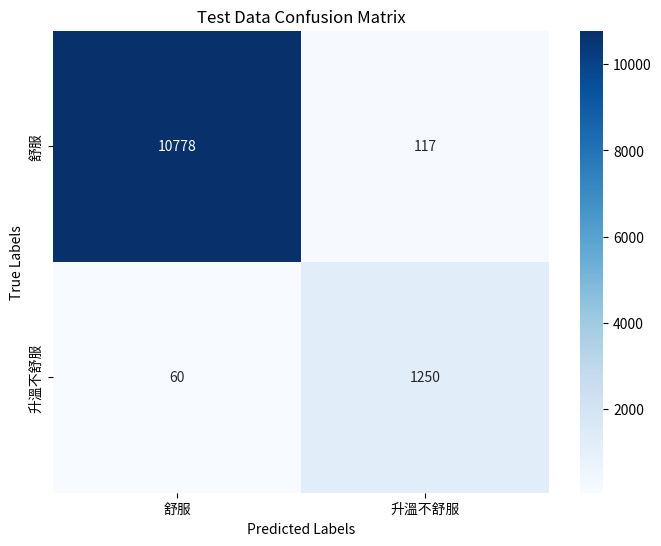

驗證集準確率: 0.9858363572515509
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99      7560
       升溫不舒服       0.93      0.95      0.94       983

    accuracy                           0.99      8543
   macro avg       0.96      0.97      0.97      8543
weighted avg       0.99      0.99      0.99      8543

驗證集混淆矩陣:


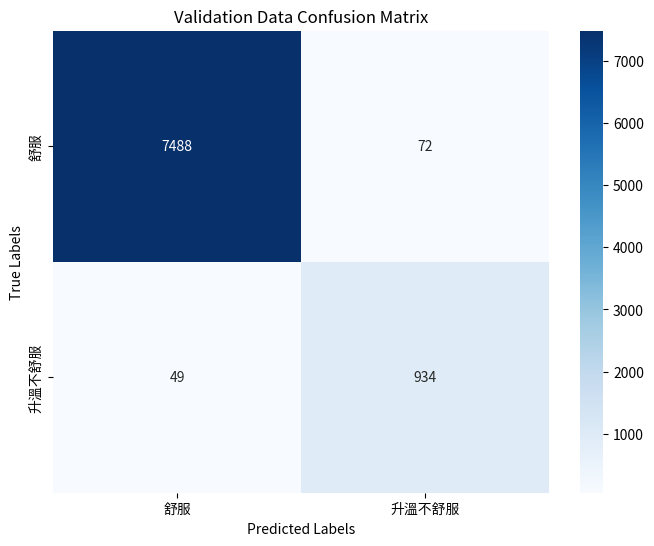

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    X_test_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['gamma']
    X_val_new.append(np.concatenate(([theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9979516591560835
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       1.00      0.98      0.99      1310

    accuracy                           1.00     12205
   macro avg       1.00      0.99      0.99     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


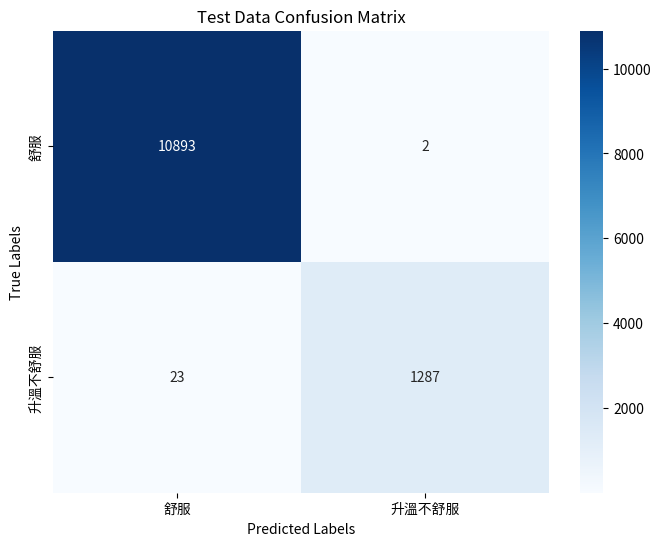

驗證集準確率: 0.9961371883413321
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7560
       升溫不舒服       0.99      0.97      0.98       983

    accuracy                           1.00      8543
   macro avg       0.99      0.99      0.99      8543
weighted avg       1.00      1.00      1.00      8543

驗證集混淆矩陣:


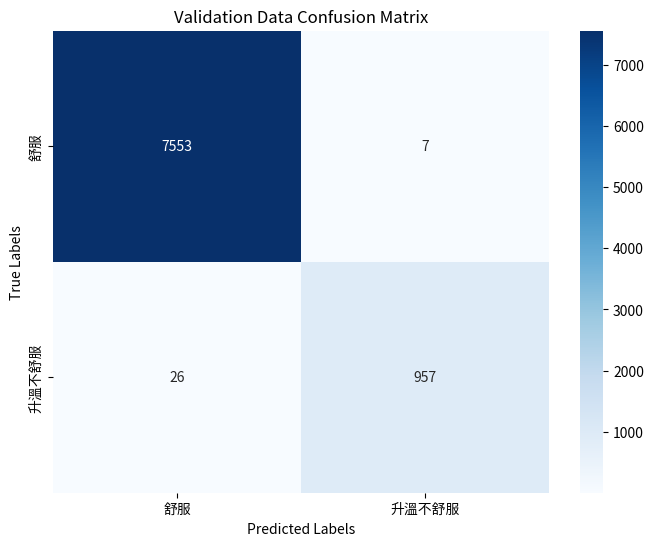

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    X_test_new.append(np.concatenate(([theta_combined])))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['gamma']
    X_val_new.append(np.concatenate(([theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9995903318312167
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       1.00      1.00      1.00      1310

    accuracy                           1.00     12205
   macro avg       1.00      1.00      1.00     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


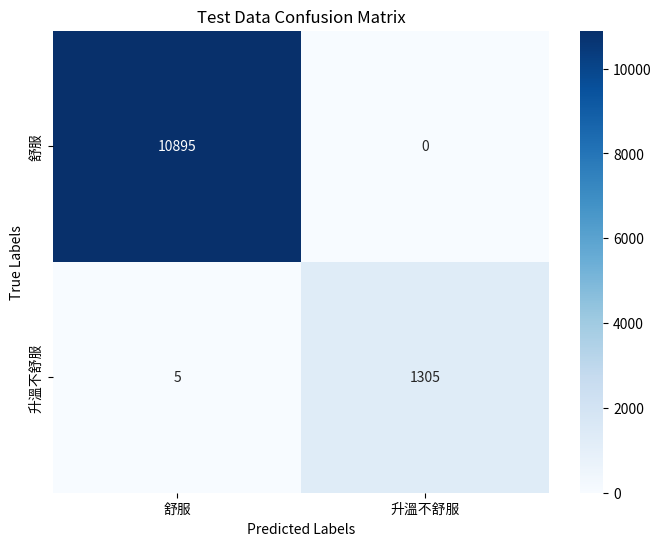

驗證集準確率: 0.999297670607515
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7560
       升溫不舒服       1.00      0.99      1.00       983

    accuracy                           1.00      8543
   macro avg       1.00      1.00      1.00      8543
weighted avg       1.00      1.00      1.00      8543

驗證集混淆矩陣:


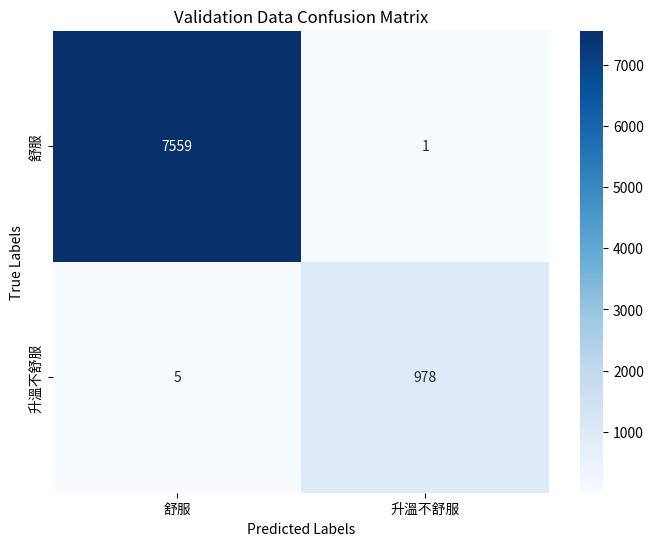

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_Cz_combined = train_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   theta_Cz_combined = test_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   theta_Cz_combined = validation_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


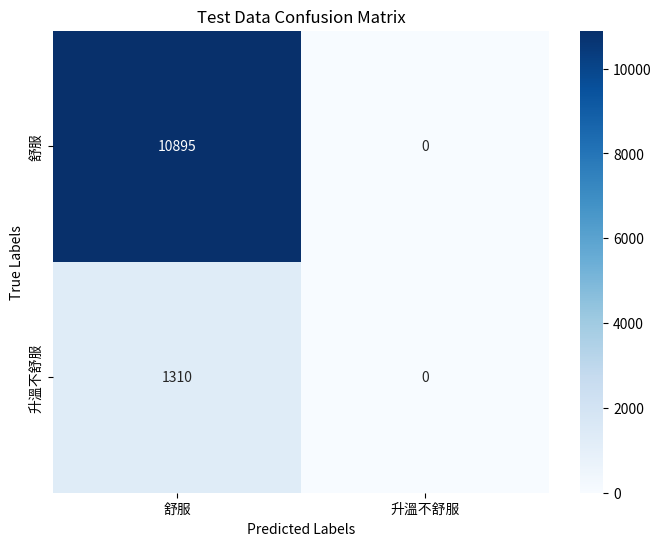

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


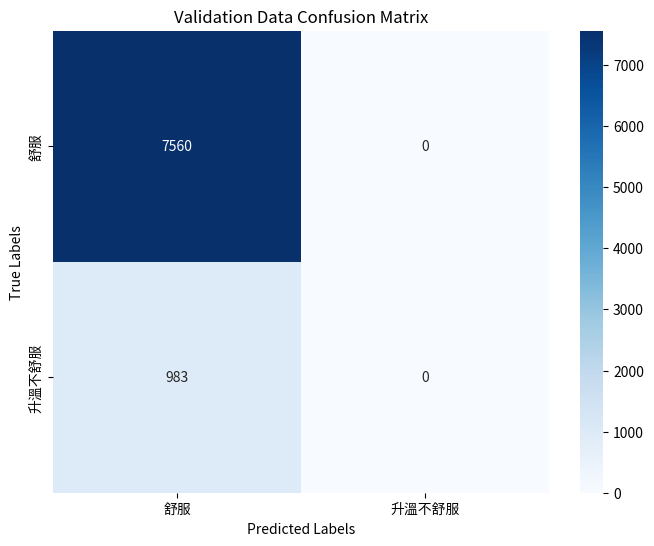

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate([theta_combined,alpha_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate([theta_combined,alpha_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['theta']
    alpha_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined,alpha_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8932404752150758
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       1.00      0.01      0.01      1310

    accuracy                           0.89     12205
   macro avg       0.95      0.50      0.48     12205
weighted avg       0.90      0.89      0.84     12205

測試集混淆矩陣:


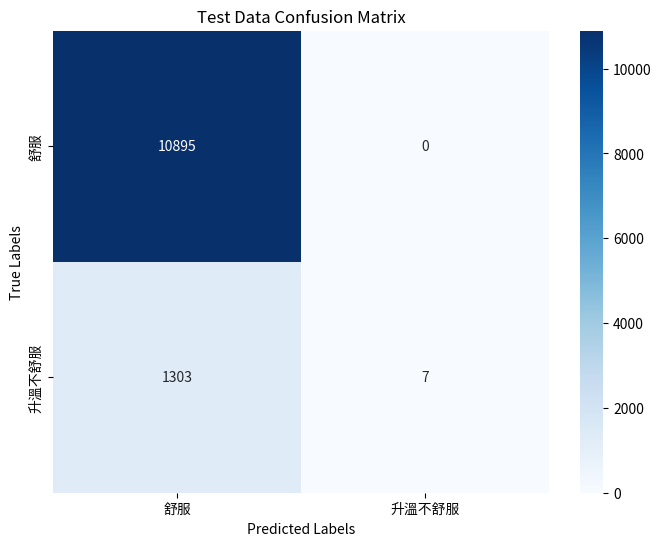

驗證集準確率: 0.8855203090249327
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94      7560
       升溫不舒服       1.00      0.01      0.01       983

    accuracy                           0.89      8543
   macro avg       0.94      0.50      0.47      8543
weighted avg       0.90      0.89      0.83      8543

驗證集混淆矩陣:


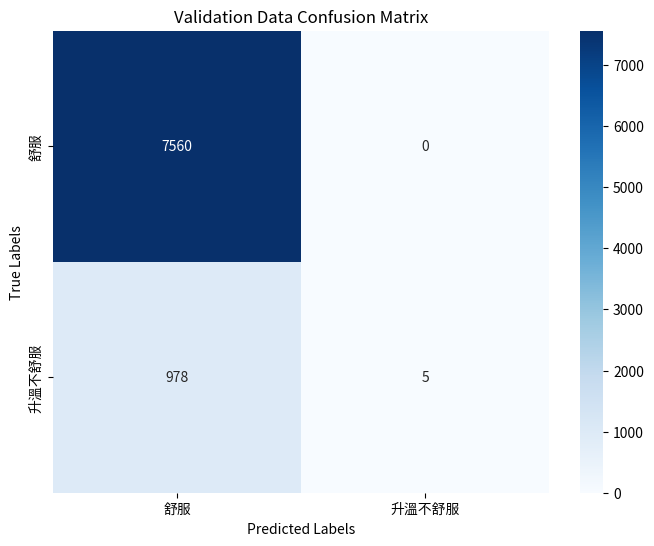

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate([theta_combined,alpha_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate([theta_combined,alpha_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    theta_combined = validation_data.iloc[i:i+2]['theta']
    alpha_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined,alpha_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.8926669397787792
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     10895
       升溫不舒服       0.00      0.00      0.00      1310

    accuracy                           0.89     12205
   macro avg       0.45      0.50      0.47     12205
weighted avg       0.80      0.89      0.84     12205

測試集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


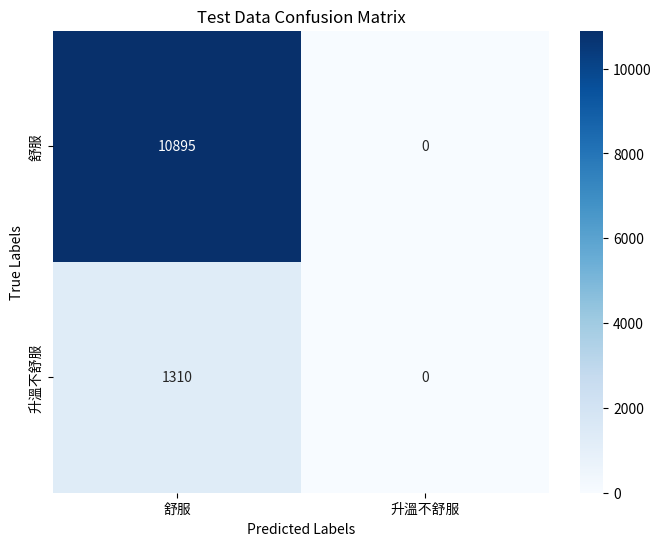

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


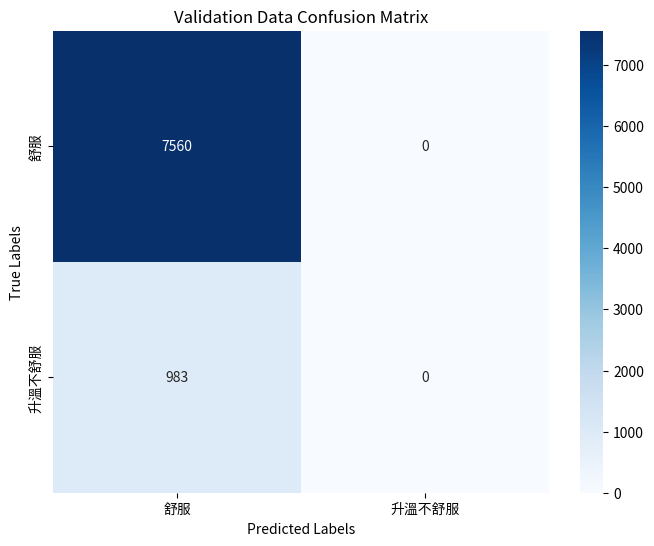

In [16]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    theta_Cz_combined = train_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
    alpha_Cz_combined = train_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
    alpha_Fz_combined = train_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   theta_Cz_combined = test_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = test_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = test_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   theta_Cz_combined = validation_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = validation_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = validation_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.985415813191315
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     10895
       升溫不舒服       0.92      0.95      0.93      1310

    accuracy                           0.99     12205
   macro avg       0.96      0.97      0.96     12205
weighted avg       0.99      0.99      0.99     12205

測試集混淆矩陣:


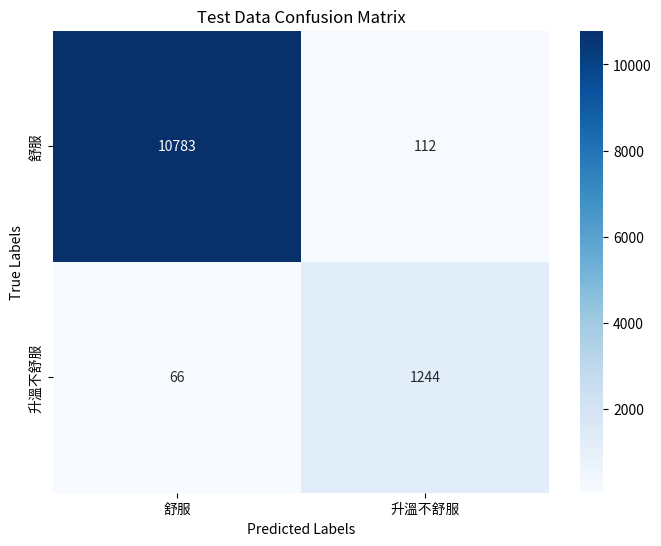

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


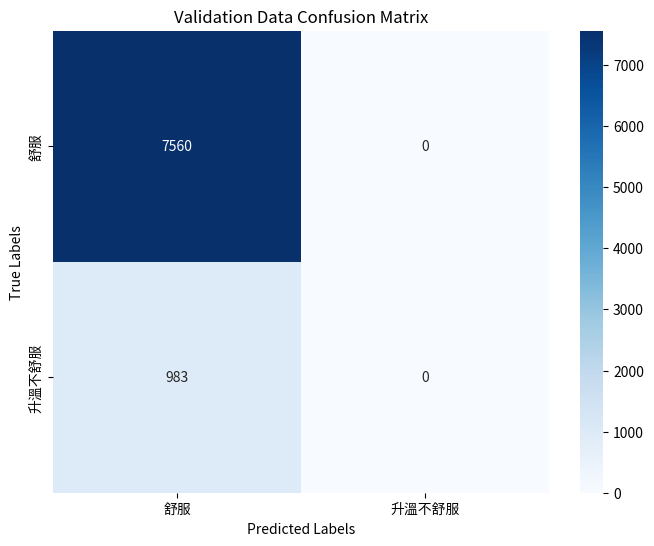

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    alpha_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate([gamma_combined,alpha_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    alpha_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate([gamma_combined,alpha_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma_combined = validation_data.iloc[i:i+2]['gamma']
    alpha_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined,alpha_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9974600573535436
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       0.99      0.98      0.99      1310

    accuracy                           1.00     12205
   macro avg       1.00      0.99      0.99     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


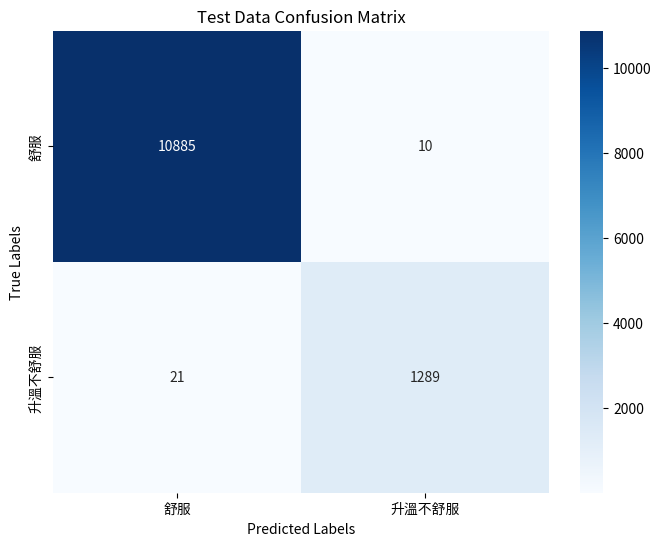

驗證集準確率: 0.8849350345311952
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      1.00      0.94      7560
       升溫不舒服       0.00      0.00      0.00       983

    accuracy                           0.88      8543
   macro avg       0.44      0.50      0.47      8543
weighted avg       0.78      0.88      0.83      8543

驗證集混淆矩陣:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


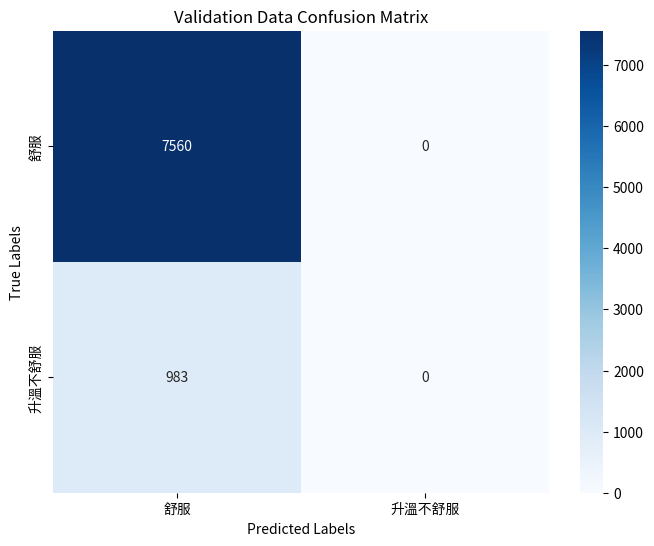

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    alpha_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate([gamma_combined,alpha_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    alpha_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate([gamma_combined,alpha_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma_combined = validation_data.iloc[i:i+2]['gamma']
    alpha_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined,alpha_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9990167963949201
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       1.00      0.99      1.00      1310

    accuracy                           1.00     12205
   macro avg       1.00      1.00      1.00     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


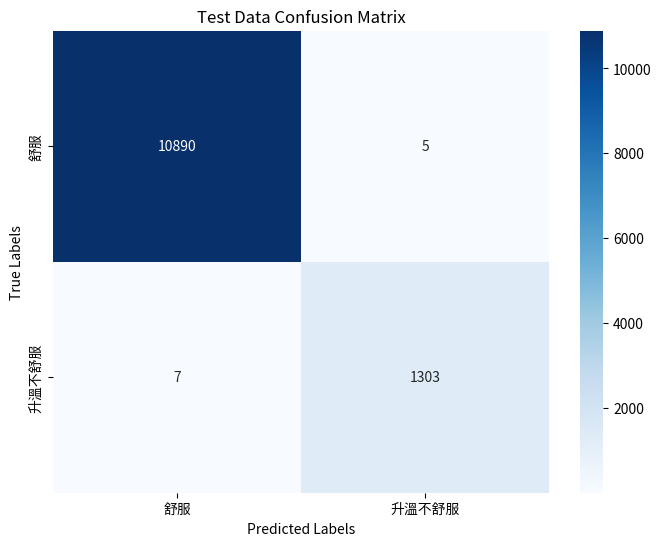

驗證集準確率: 0.9989465059112724
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7560
       升溫不舒服       1.00      0.99      1.00       983

    accuracy                           1.00      8543
   macro avg       1.00      1.00      1.00      8543
weighted avg       1.00      1.00      1.00      8543

驗證集混淆矩陣:


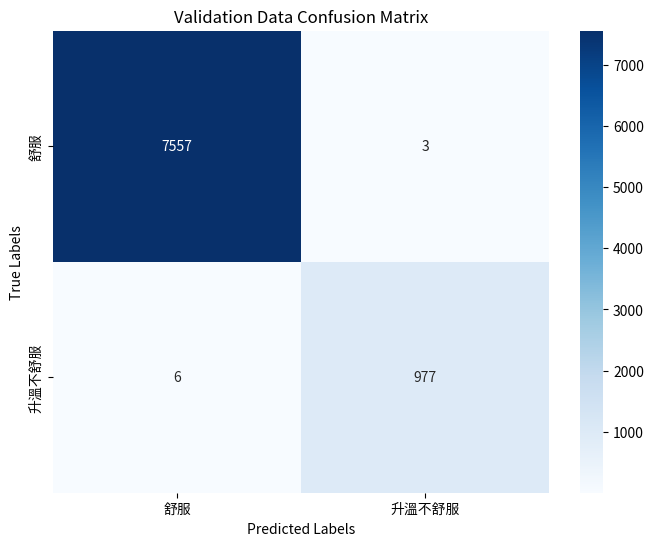

In [19]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_Cz_combined = train_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
    gamma_Fz_combined = train_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
    alpha_Cz_combined = train_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
    alpha_Fz_combined = train_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   gamma_Cz_combined = test_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = test_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   alpha_Cz_combined = test_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = test_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   gamma_Cz_combined = validation_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = validation_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   alpha_Cz_combined = validation_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = validation_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9862351495288816
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     10895
       升溫不舒服       0.92      0.95      0.94      1310

    accuracy                           0.99     12205
   macro avg       0.96      0.97      0.96     12205
weighted avg       0.99      0.99      0.99     12205

測試集混淆矩陣:


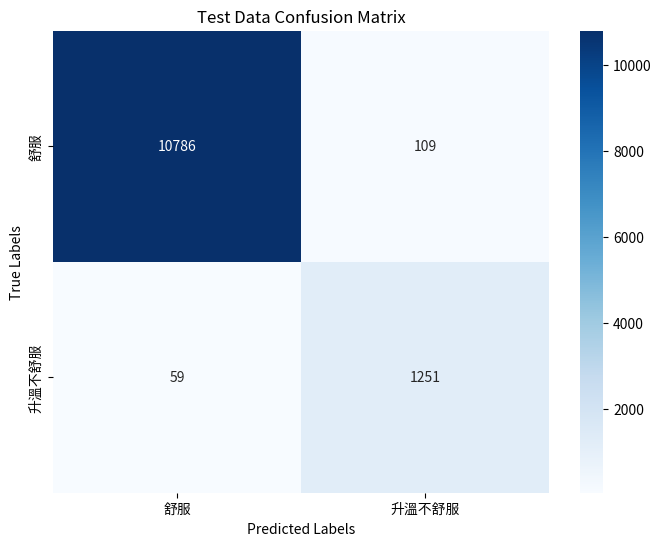

驗證集準確率: 0.8330797143860471
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      0.94      0.91      7560
       升溫不舒服       0.08      0.04      0.05       983

    accuracy                           0.83      8543
   macro avg       0.48      0.49      0.48      8543
weighted avg       0.79      0.83      0.81      8543

驗證集混淆矩陣:


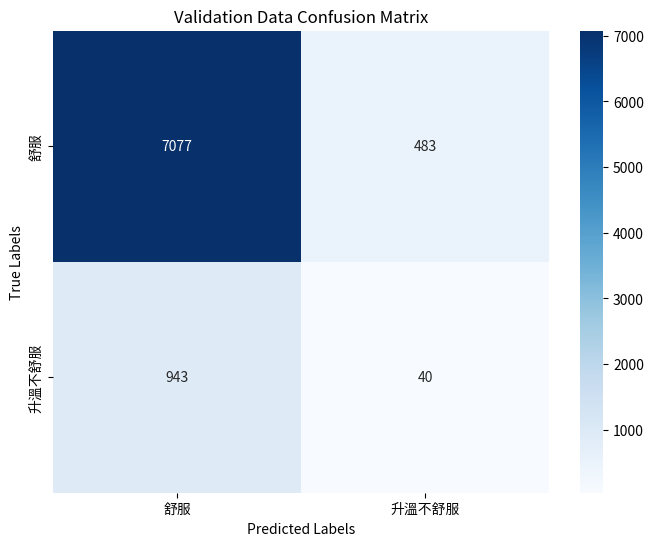

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    X_train_new.append(np.concatenate([gamma_combined,theta_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    X_test_new.append(np.concatenate([gamma_combined,theta_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma_combined = validation_data.iloc[i:i+2]['gamma']
    theta_combined = validation_data.iloc[i:i+2]['theta']
    X_val_new.append(np.concatenate(([theta_combined,theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9972142564522737
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       0.99      0.98      0.99      1310

    accuracy                           1.00     12205
   macro avg       0.99      0.99      0.99     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


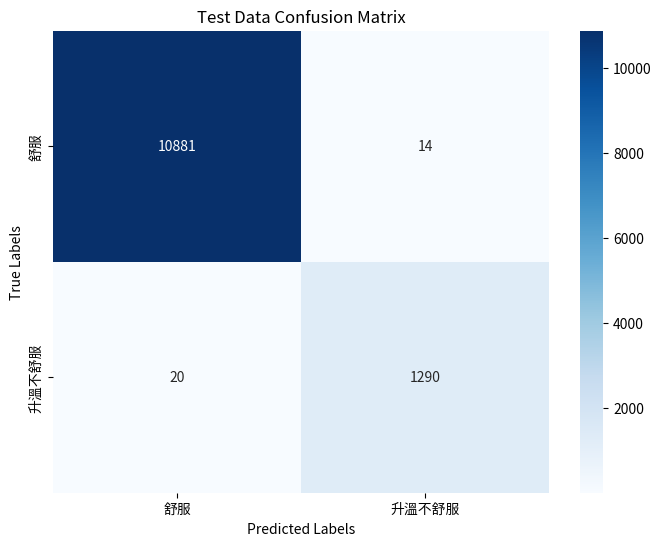

驗證集準確率: 0.8322603300948145
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      0.92      0.91      7560
       升溫不舒服       0.20      0.15      0.17       983

    accuracy                           0.83      8543
   macro avg       0.54      0.53      0.54      8543
weighted avg       0.81      0.83      0.82      8543

驗證集混淆矩陣:


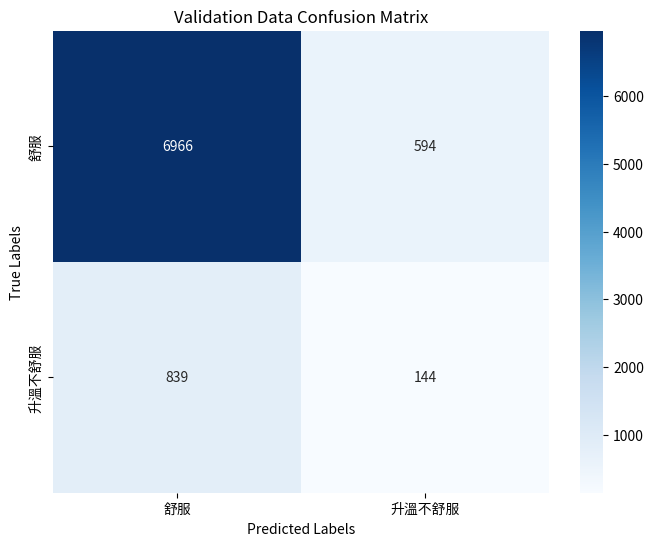

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    X_train_new.append(np.concatenate([gamma_combined,theta_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    X_test_new.append(np.concatenate([gamma_combined,theta_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma_combined = validation_data.iloc[i:i+2]['gamma']
    theta_combined = validation_data.iloc[i:i+2]['theta']
    X_val_new.append(np.concatenate(([theta_combined,theta_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9990167963949201
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       1.00      0.99      1.00      1310

    accuracy                           1.00     12205
   macro avg       1.00      1.00      1.00     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


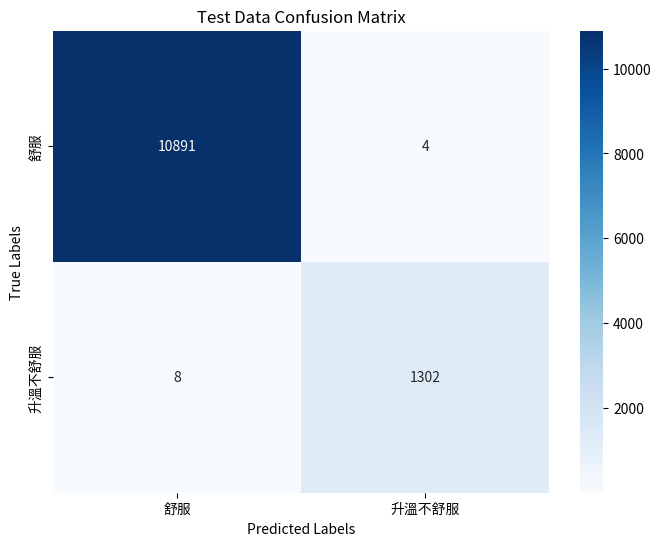

驗證集準確率: 0.9988294510125248
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7560
       升溫不舒服       1.00      0.99      0.99       983

    accuracy                           1.00      8543
   macro avg       1.00      1.00      1.00      8543
weighted avg       1.00      1.00      1.00      8543

驗證集混淆矩陣:


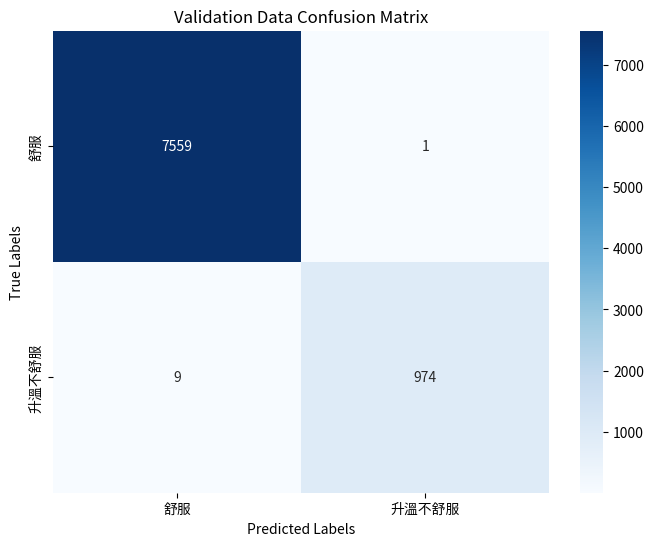

In [22]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_Cz_combined = train_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
    gamma_Fz_combined = train_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
    theta_Cz_combined = train_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   gamma_Cz_combined = test_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = test_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = test_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   gamma_Cz_combined = validation_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = validation_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = validation_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9852519459238017
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     10895
       升溫不舒服       0.92      0.94      0.93      1310

    accuracy                           0.99     12205
   macro avg       0.96      0.97      0.96     12205
weighted avg       0.99      0.99      0.99     12205

測試集混淆矩陣:


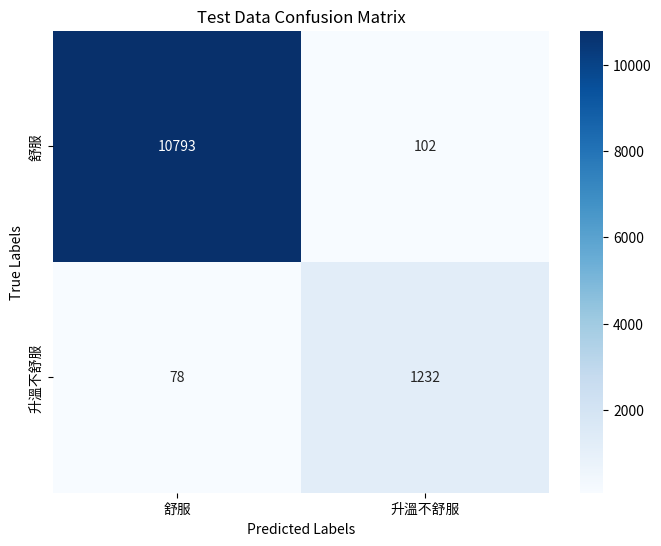

驗證集準確率: 0.8320262202973194
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.88      0.93      0.91      7560
       升溫不舒服       0.09      0.05      0.07       983

    accuracy                           0.83      8543
   macro avg       0.49      0.49      0.49      8543
weighted avg       0.79      0.83      0.81      8543

驗證集混淆矩陣:


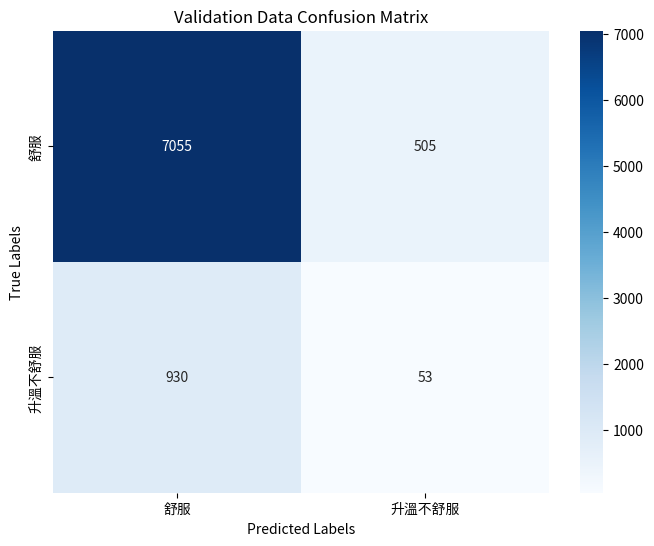

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate([gamma_combined,theta_combined,alpha_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate([gamma_combined,theta_combined,alpha_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma_combined = validation_data.iloc[i:i+2]['gamma']
    theta_combined = validation_data.iloc[i:i+2]['theta']
    alpha_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined,theta_combined,alpha_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.997378123719787
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       0.99      0.99      0.99      1310

    accuracy                           1.00     12205
   macro avg       0.99      0.99      0.99     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


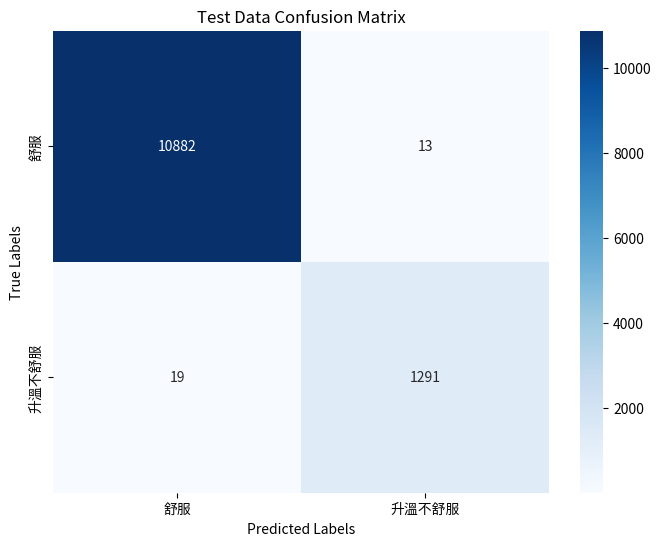

驗證集準確率: 0.8370595809434624
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      0.93      0.91      7560
       升溫不舒服       0.21      0.15      0.18       983

    accuracy                           0.84      8543
   macro avg       0.55      0.54      0.54      8543
weighted avg       0.82      0.84      0.83      8543

驗證集混淆矩陣:


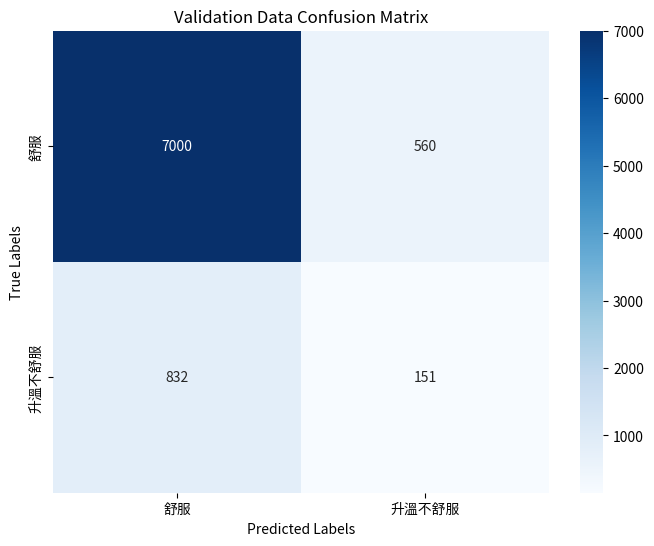

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_combined = train_data.iloc[i:i+2]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i:i+2]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i:i+2]['alpha']  # 直接取出數值
    X_train_new.append(np.concatenate([gamma_combined,theta_combined,alpha_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma_combined = test_data.iloc[i:i+2]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i:i+2]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i:i+2]['alpha']  # 使用theta值
    X_test_new.append(np.concatenate([gamma_combined,theta_combined,alpha_combined]))  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma_combined = validation_data.iloc[i:i+2]['gamma']
    theta_combined = validation_data.iloc[i:i+2]['theta']
    alpha_combined = validation_data.iloc[i:i+2]['alpha']
    X_val_new.append(np.concatenate(([theta_combined,theta_combined,alpha_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9985251945923802
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10895
       升溫不舒服       0.99      0.99      0.99      1310

    accuracy                           1.00     12205
   macro avg       1.00      1.00      1.00     12205
weighted avg       1.00      1.00      1.00     12205

測試集混淆矩陣:


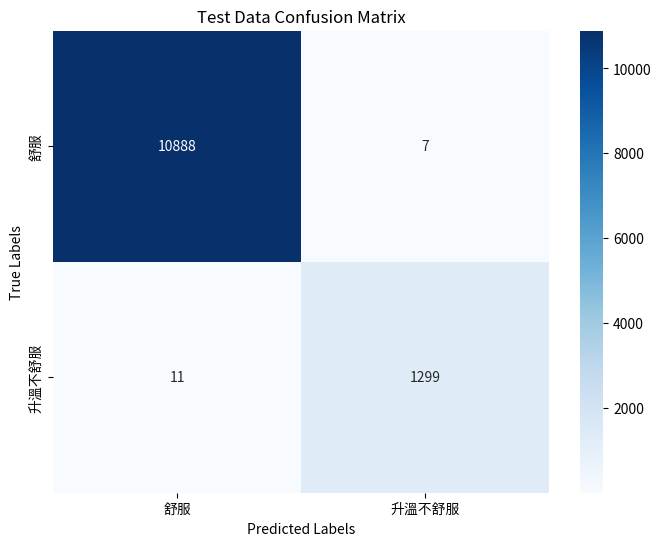

驗證集準確率: 0.9983612314175349
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7560
       升溫不舒服       1.00      0.99      0.99       983

    accuracy                           1.00      8543
   macro avg       1.00      0.99      1.00      8543
weighted avg       1.00      1.00      1.00      8543

驗證集混淆矩陣:


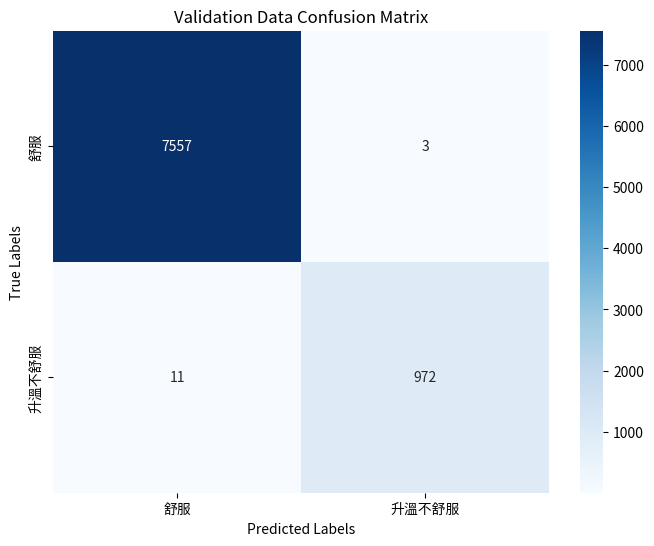

In [25]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma_Cz_combined = train_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
    gamma_Fz_combined = train_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
    theta_Cz_combined = train_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
    alpha_Cz_combined = train_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
    alpha_Fz_combined = train_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
    X_train_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
   gamma_Cz_combined = test_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = test_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = test_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = test_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = test_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_test_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
   gamma_Cz_combined = validation_data.iloc[i:i+2]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = validation_data.iloc[i:i+2]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = validation_data.iloc[i:i+2]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i:i+2]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = validation_data.iloc[i:i+2]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = validation_data.iloc[i:i+2]['alpha_Fz']  # 直接取出數值
   X_val_new.append(np.concatenate(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined])))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9998344507904975
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10950
       升溫不舒服       1.00      1.00      1.00      1131

    accuracy                           1.00     12081
   macro avg       1.00      1.00      1.00     12081
weighted avg       1.00      1.00      1.00     12081

測試集混淆矩陣:


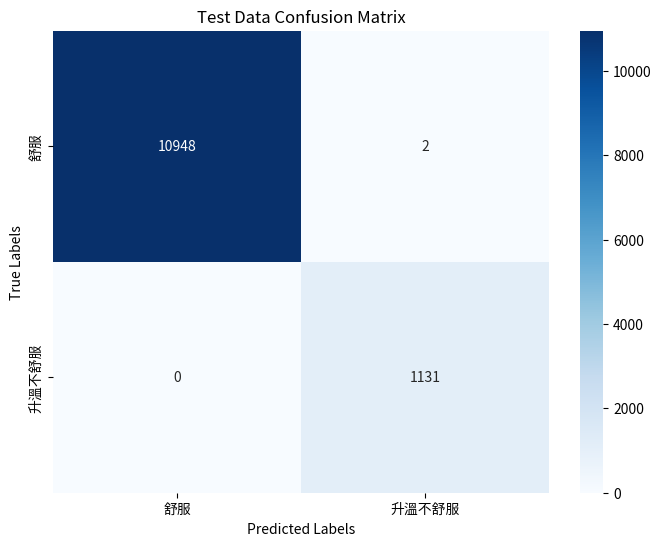

驗證集準確率: 0.9998817547593709
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7580
       升溫不舒服       1.00      1.00      1.00       877

    accuracy                           1.00      8457
   macro avg       1.00      1.00      1.00      8457
weighted avg       1.00      1.00      1.00      8457

驗證集混淆矩陣:


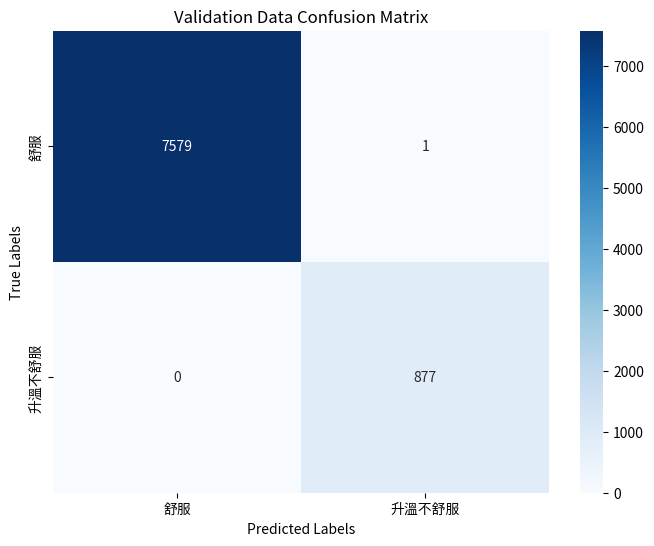

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_gamma6_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma3_combined = train_data.iloc[i:i+2]['gamma3']  # 直接取出數值
    gamma1_combined = train_data.iloc[i:i+2]['gamma1']  # 直接取出數值
    gamma2_combined = train_data.iloc[i:i+2]['gamma2']  # 直接取出數值
    gamma4_combined = train_data.iloc[i:i+2]['gamma4']
    gamma5_combined = train_data.iloc[i:i+2]['gamma5']
    gamma6_combined = train_data.iloc[i:i+2]['gamma6']
    X_train_new.append(np.concatenate(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined])))
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma3_combined = test_data.iloc[i:i+2]['gamma3']  # 直接取出數值
    gamma1_combined = test_data.iloc[i:i+2]['gamma1']  # 直接取出數值
    gamma2_combined = test_data.iloc[i:i+2]['gamma2']  # 直接取出數值
    gamma4_combined = test_data.iloc[i:i+2]['gamma4']
    gamma5_combined = test_data.iloc[i:i+2]['gamma5']
    gamma6_combined = test_data.iloc[i:i+2]['gamma6']
    X_test_new.append(np.concatenate(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined])))
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma3_combined = validation_data.iloc[i:i+2]['gamma3']  # 直接取出數值
    gamma1_combined = validation_data.iloc[i:i+2]['gamma1']  # 直接取出數值
    gamma2_combined = validation_data.iloc[i:i+2]['gamma2']  # 直接取出數值
    gamma4_combined = validation_data.iloc[i:i+2]['gamma4']
    gamma5_combined = validation_data.iloc[i:i+2]['gamma5']
    gamma6_combined = validation_data.iloc[i:i+2]['gamma6']
    X_val_new.append(np.concatenate(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 1.0
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10950
       升溫不舒服       1.00      1.00      1.00      1131

    accuracy                           1.00     12081
   macro avg       1.00      1.00      1.00     12081
weighted avg       1.00      1.00      1.00     12081

測試集混淆矩陣:


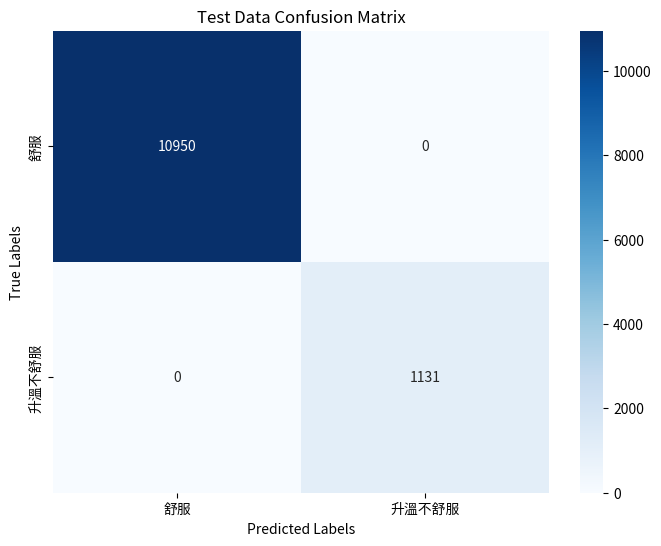

驗證集準確率: 1.0
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7580
       升溫不舒服       1.00      1.00      1.00       877

    accuracy                           1.00      8457
   macro avg       1.00      1.00      1.00      8457
weighted avg       1.00      1.00      1.00      8457

驗證集混淆矩陣:


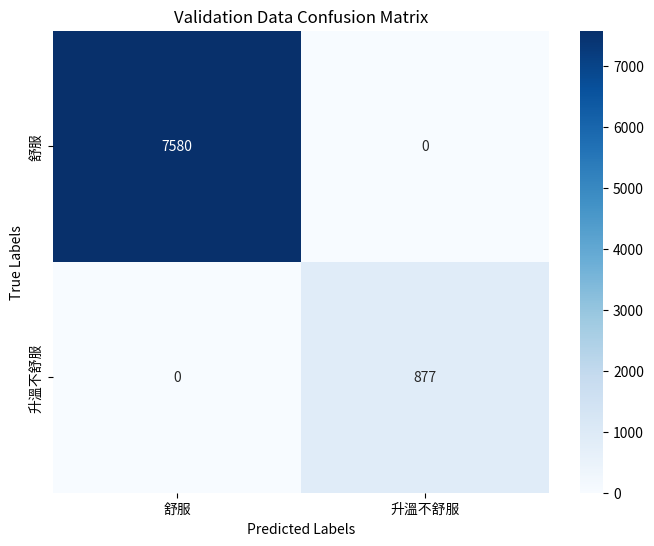

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_gamma6_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma3_combined = train_data.iloc[i:i+2]['gamma3']  # 直接取出數值
    gamma1_combined = train_data.iloc[i:i+2]['gamma1']  # 直接取出數值
    gamma2_combined = train_data.iloc[i:i+2]['gamma2']  # 直接取出數值
    gamma4_combined = train_data.iloc[i:i+2]['gamma4']
    gamma5_combined = train_data.iloc[i:i+2]['gamma5']
    gamma6_combined = train_data.iloc[i:i+2]['gamma6']
    X_train_new.append(np.concatenate(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined])))
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma3_combined = test_data.iloc[i:i+2]['gamma3']  # 直接取出數值
    gamma1_combined = test_data.iloc[i:i+2]['gamma1']  # 直接取出數值
    gamma2_combined = test_data.iloc[i:i+2]['gamma2']  # 直接取出數值
    gamma4_combined = test_data.iloc[i:i+2]['gamma4']
    gamma5_combined = test_data.iloc[i:i+2]['gamma5']
    gamma6_combined = test_data.iloc[i:i+2]['gamma6']
    X_test_new.append(np.concatenate(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined])))
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma3_combined = validation_data.iloc[i:i+2]['gamma3']  # 直接取出數值
    gamma1_combined = validation_data.iloc[i:i+2]['gamma1']  # 直接取出數值
    gamma2_combined = validation_data.iloc[i:i+2]['gamma2']  # 直接取出數值
    gamma4_combined = validation_data.iloc[i:i+2]['gamma4']
    gamma5_combined = validation_data.iloc[i:i+2]['gamma5']
    gamma6_combined = validation_data.iloc[i:i+2]['gamma6']
    X_val_new.append(np.concatenate(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 1.0
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     10950
       升溫不舒服       1.00      1.00      1.00      1131

    accuracy                           1.00     12081
   macro avg       1.00      1.00      1.00     12081
weighted avg       1.00      1.00      1.00     12081

測試集混淆矩陣:


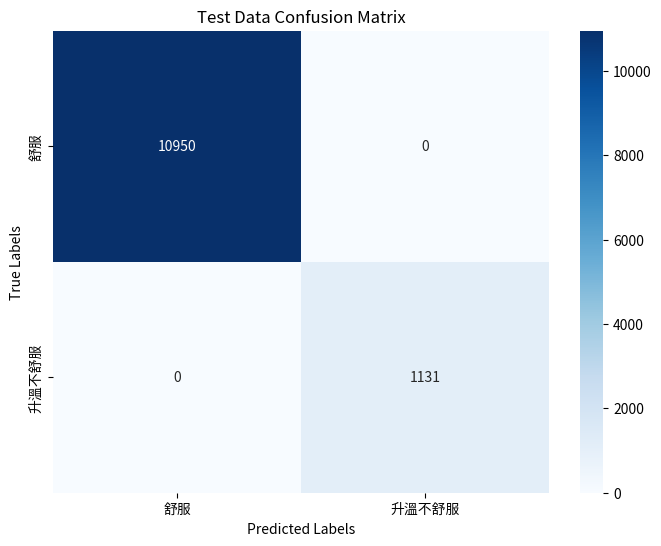

驗證集準確率: 1.0
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00      7580
       升溫不舒服       1.00      1.00      1.00       877

    accuracy                           1.00      8457
   macro avg       1.00      1.00      1.00      8457
weighted avg       1.00      1.00      1.00      8457

驗證集混淆矩陣:


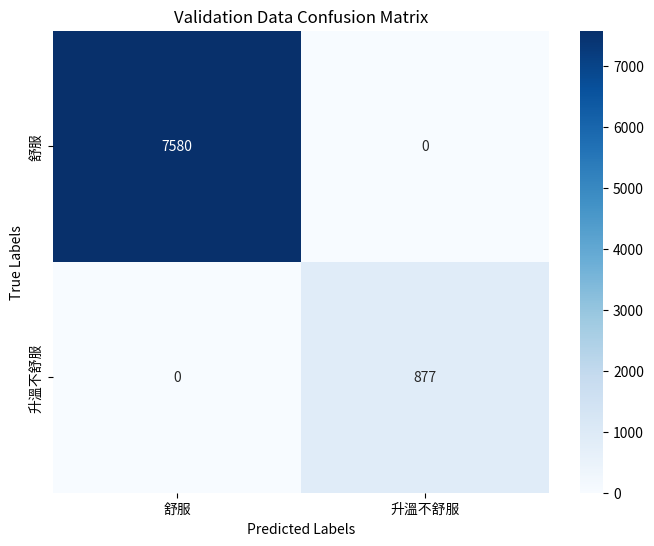

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_gamma6_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(0, len(train_data) - 1, 2):
    gamma1_CZ_combined = train_data.iloc[i:i+2]['gamma1_Cz']
    gamma2_CZ_combined = train_data.iloc[i:i+2]['gamma2_Cz']
    gamma3_CZ_combined = train_data.iloc[i:i+2]['gamma3_Cz']
    gamma4_CZ_combined = train_data.iloc[i:i+2]['gamma4_Cz']
    gamma5_CZ_combined = train_data.iloc[i:i+2]['gamma5_Cz'] 
    gamma6_CZ_combined = train_data.iloc[i:i+2]['gamma6_Cz'] 
    gamma1_FZ_combined = train_data.iloc[i:i+2]['gamma1_Fz'] 
    gamma2_FZ_combined = train_data.iloc[i:i+2]['gamma2_Fz'] 
    gamma3_FZ_combined = train_data.iloc[i:i+2]['gamma3_Fz'] 
    gamma4_FZ_combined = train_data.iloc[i:i+2]['gamma4_Fz'] 
    gamma5_FZ_combined = train_data.iloc[i:i+2]['gamma5_Fz'] 
    gamma6_FZ_combined = train_data.iloc[i:i+2]['gamma6_Fz'] 
    #X_train_new.append(np.concatenate([gamma2_CZ_combined, gamma3_CZ_combined,gamma2_FZ_combined, gamma3_FZ_combined]))
    X_train_new.append(np.concatenate(([gamma1_CZ_combined,gamma2_CZ_combined, gamma3_CZ_combined,gamma4_CZ_combined,gamma5_CZ_combined, gamma6_CZ_combined,gamma1_FZ_combined,gamma2_FZ_combined, gamma3_FZ_combined,gamma4_FZ_combined,gamma5_FZ_combined, gamma6_FZ_combined])))
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(0, len(test_data) - 1, 2):
    gamma1_CZ_combined = test_data.iloc[i:i+2]['gamma1_Cz'] 
    gamma2_CZ_combined = test_data.iloc[i:i+2]['gamma2_Cz'] 
    gamma3_CZ_combined = test_data.iloc[i:i+2]['gamma3_Cz'] 
    gamma4_CZ_combined = test_data.iloc[i:i+2]['gamma4_Cz'] 
    gamma5_CZ_combined = test_data.iloc[i:i+2]['gamma5_Cz'] 
    gamma6_CZ_combined = test_data.iloc[i:i+2]['gamma6_Cz'] 
    gamma1_FZ_combined = test_data.iloc[i:i+2]['gamma1_Fz'] 
    gamma2_FZ_combined = test_data.iloc[i:i+2]['gamma2_Fz'] 
    gamma3_FZ_combined = test_data.iloc[i:i+2]['gamma3_Fz'] 
    gamma4_FZ_combined = test_data.iloc[i:i+2]['gamma4_Fz'] 
    gamma5_FZ_combined = test_data.iloc[i:i+2]['gamma5_Fz'] 
    gamma6_FZ_combined = test_data.iloc[i:i+2]['gamma6_Fz'] 
    #X_train_new.append(np.concatenate([gamma2_CZ_combined, gamma3_CZ_combined,gamma2_FZ_combined, gamma3_FZ_combined]))
    X_test_new.append(np.concatenate(([gamma1_CZ_combined,gamma2_CZ_combined, gamma3_CZ_combined,gamma4_CZ_combined,gamma5_CZ_combined, gamma6_CZ_combined,gamma1_FZ_combined,gamma2_FZ_combined, gamma3_FZ_combined,gamma4_FZ_combined,gamma5_FZ_combined, gamma6_FZ_combined])))
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range(0, len(validation_data) - 1, 2):
    gamma1_CZ_combined = validation_data.iloc[i:i+2]['gamma1_Cz'] 
    gamma2_CZ_combined = validation_data.iloc[i:i+2]['gamma2_Cz'] 
    gamma3_CZ_combined = validation_data.iloc[i:i+2]['gamma3_Cz'] 
    gamma4_CZ_combined = validation_data.iloc[i:i+2]['gamma4_Cz'] 
    gamma5_CZ_combined = validation_data.iloc[i:i+2]['gamma5_Cz'] 
    gamma6_CZ_combined = validation_data.iloc[i:i+2]['gamma6_Cz'] 
    gamma1_FZ_combined = validation_data.iloc[i:i+2]['gamma1_Fz'] 
    gamma2_FZ_combined = validation_data.iloc[i:i+2]['gamma2_Fz'] 
    gamma3_FZ_combined = validation_data.iloc[i:i+2]['gamma3_Fz'] 
    gamma4_FZ_combined = validation_data.iloc[i:i+2]['gamma4_Fz'] 
    gamma5_FZ_combined = validation_data.iloc[i:i+2]['gamma5_Fz'] 
    gamma6_FZ_combined = validation_data.iloc[i:i+2]['gamma6_Fz'] 
    #X_train_new.append(np.concatenate([gamma2_CZ_combined, gamma3_CZ_combined,gamma2_FZ_combined, gamma3_FZ_combined]))
    X_val_new.append(np.concatenate(([gamma1_CZ_combined,gamma2_CZ_combined, gamma3_CZ_combined,gamma4_CZ_combined,gamma5_CZ_combined, gamma6_CZ_combined,gamma1_FZ_combined,gamma2_FZ_combined, gamma3_FZ_combined,gamma4_FZ_combined,gamma5_FZ_combined, gamma6_FZ_combined])))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = SVC(kernel='rbf', random_state=42)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()